In [26]:
# @title 1. Importação das Bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")



In [27]:
# @title 2. Extração dos Dados (API GitHub)

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

df_raw = pd.read_json(url)
df_raw.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [28]:
# @title 3. Expansão das Colunas Aninhadas

# Expandir colunas aninhadas
df = pd.concat([
    df_raw.drop(columns=["customer", "phone", "internet", "account"]),
    pd.json_normalize(df_raw["customer"]),
    pd.json_normalize(df_raw["phone"]),
    pd.json_normalize(df_raw["internet"]),
    pd.json_normalize(df_raw["account"])
], axis=1)

df.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [29]:
# @title 4. Verificação da Estrutura dos Dados

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,SeniorCitizen,tenure,Charges.Monthly
count,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098
std,0.369074,24.571773,30.129572
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.425000
50%,0.000000,29.000000,70.300000
75%,0.000000,55.000000,89.875000
max,1.000000,72.000000,118.750000


In [30]:
# @title 5. Limpeza e Tratamento dos Dados

In [31]:
# @title 5.1 Tratamento de valores inválidos
# Converter Charges.Total para numérico
df["Charges.Total"] = pd.to_numeric(df["Charges.Total"], errors="coerce")

# Remover registros inválidos
df = df.dropna(subset=["Charges.Total"])



In [32]:
# @title 5.2 Padronização de valores categóricos
# Padronizar valores
df.replace({
    "No internet service": "No",
    "No phone service": "No"
}, inplace=True)

# Converter colunas binárias
bin_cols = ["Churn", "Partner", "Dependents", "PhoneService", "PaperlessBilling"]

for col in bin_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})



In [33]:
# @title 6. Criação de Novas Variáveis

# Valor diário médio
df["Contas_Diarias"] = df["Charges.Monthly"] / 30

# Quantidade de serviços contratados
servicos = [
    "OnlineSecurity", "OnlineBackup", "DeviceProtection",
    "TechSupport", "StreamingTV", "StreamingMovies"
]

df["Num_Servicos"] = df[servicos].apply(lambda x: (x == "Yes").sum(), axis=1)


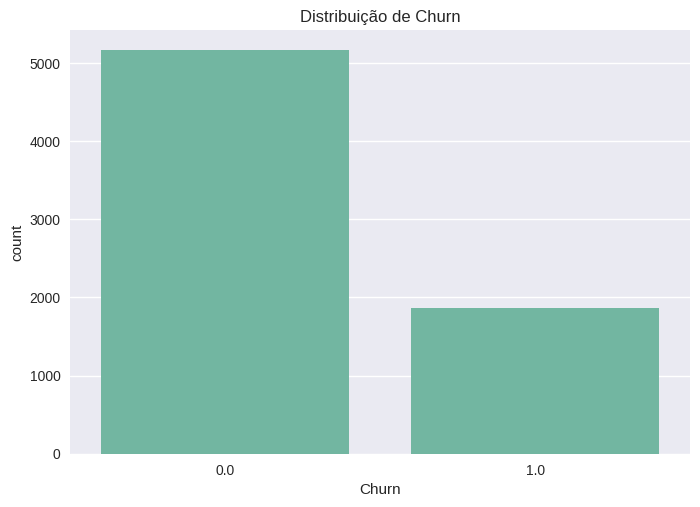

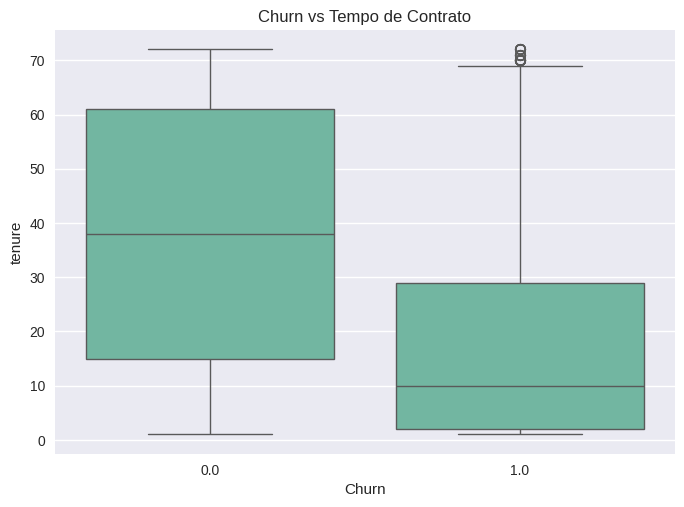

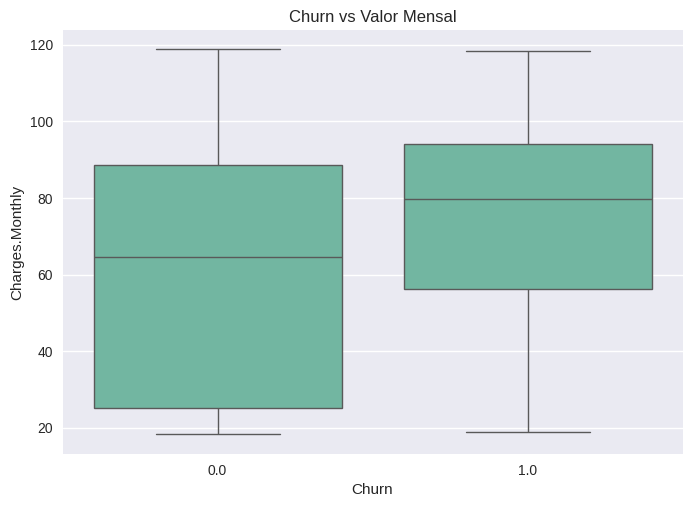

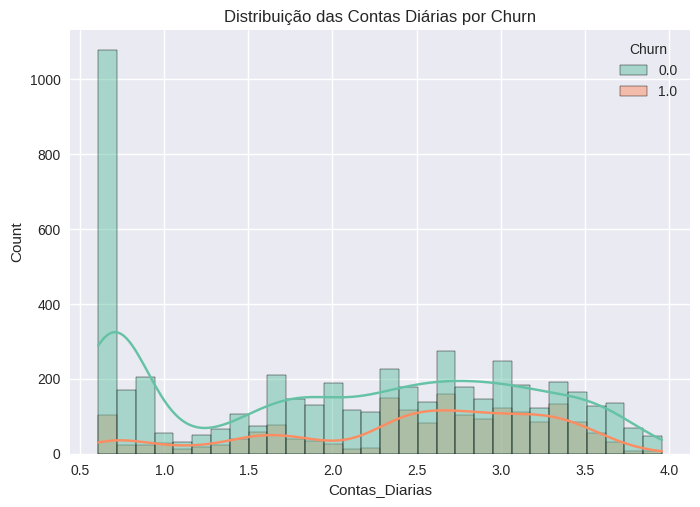

In [34]:
# @title 7. Análise Exploratória dos Dados (EDA)

## Distribuição do Churn
sns.countplot(x="Churn", data=df)
plt.title("Distribuição de Churn")
plt.show()

## Churn x Tempo de Contrato
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Churn vs Tempo de Contrato")
plt.show()

## Churn x Valor Mensal
sns.boxplot(x="Churn", y="Charges.Monthly", data=df)
plt.title("Churn vs Valor Mensal")
plt.show()

## Distribuição das Contas Diárias
sns.histplot(data=df, x="Contas_Diarias", hue="Churn", kde=True, bins=30)
plt.title("Distribuição das Contas Diárias por Churn")
plt.show()


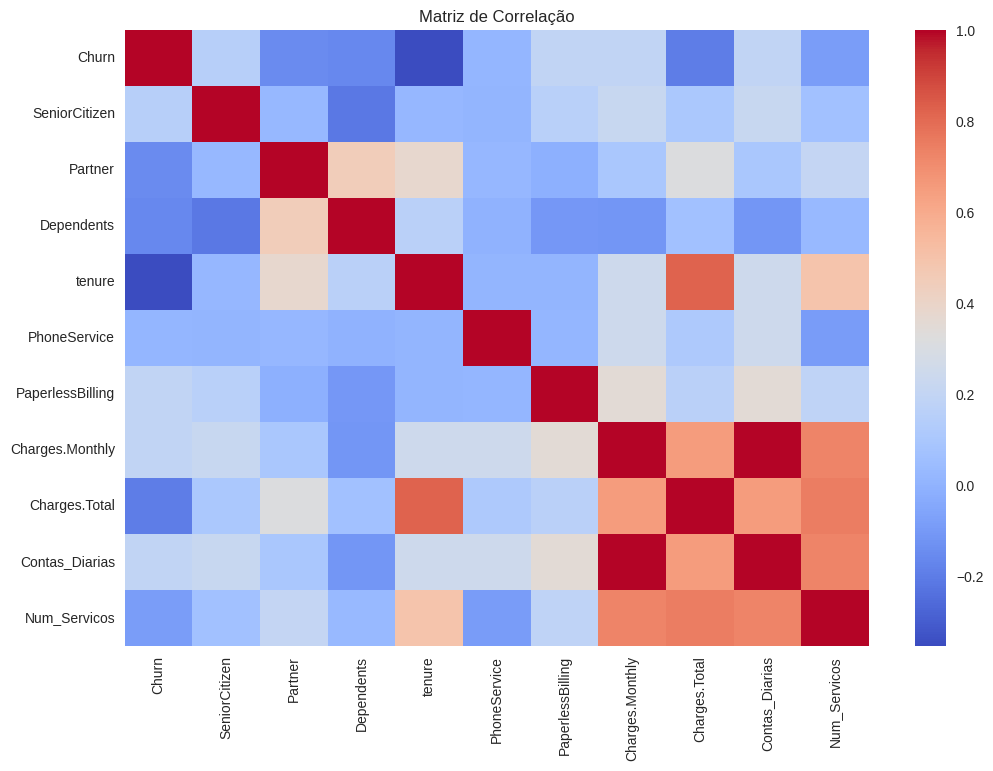

In [35]:
# @title 8. Análise de Correlação

plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Matriz de Correlação")
plt.show()


In [36]:
# @title 9. Conclusões Automáticas (Resumo Técnico)

print("Resumo Estatístico:")
display(df.describe())

print("\nCorrelação com Churn:")
print(corr["Churn"].sort_values(ascending=False))



Resumo Estatístico:


,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Contas_Diarias,Num_Servicos
count,7032.000000,7256.0000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.265785,0.1629,0.483600,0.299063,32.395535,0.902839,0.593716,64.755423,2280.634213,2.158514,2.034454
std,0.441782,0.3693,0.499765,0.457879,24.558067,0.296197,0.491173,30.125739,2268.632997,1.004191,1.848105
min,0.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333,0.000000
25%,0.000000,0.0000,0.000000,0.000000,9.000000,1.000000,0.000000,35.450000,400.225000,1.181667,0.000000
50%,0.000000,0.0000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,2.343333,2.000000
75%,1.000000,0.0000,1.000000,1.000000,55.000000,1.000000,1.000000,89.900000,3785.300000,2.996667,3.000000
max,1.000000,1.0000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333,6.000000



Correlação com Churn:
Churn               1.000000
Contas_Diarias      0.192858
Charges.Monthly     0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PhoneService        0.011691
Num_Servicos       -0.087882
Partner            -0.149982
Dependents         -0.163128
Charges.Total      -0.199484
tenure             -0.354049
Name: Churn, dtype: float64


In [37]:
# @title 10. (Opcional) Preparação para Modelagem

# One-Hot Encoding
df_model = pd.get_dummies(df, drop_first=True)

# Separação de features e target
X = df_model.drop("Churn", axis=1)
y = df_model["Churn"]


## Relatório Final

📊 Análise de Evasão de Clientes – Telecom X
Relatório Executivo
🎯 Objetivo do Projeto

Analisar os dados de clientes da Telecom X para identificar padrões de evasão (churn), compreender os fatores que influenciam o cancelamento dos serviços e propor ações estratégicas para reduzir perdas e aumentar a retenção.

📌 Contexto do Negócio

A evasão de clientes representa perda direta de receita.

O custo de adquirir novos clientes é significativamente maior que o de reter os atuais.

Entender o comportamento do cliente permite ações preditivas e mais eficientes.

🔍 Fonte e Estrutura dos Dados

Dados obtidos via API pública (formato JSON).

Informações analisadas:

Perfil do cliente

Serviços contratados

Tipo de contrato

Forma de pagamento

Histórico financeiro

Indicador de churn

⚙️ Processo de ETL (Resumo Executivo)
1. Extração

Dados coletados diretamente da API oficial do projeto.

2. Transformação

Normalização de dados aninhados.

Padronização de categorias.

Tratamento de valores ausentes e inconsistentes.

Criação de novas métricas estratégicas:

Valor diário do cliente

Quantidade de serviços contratados

3. Carga

Dataset estruturado, limpo e pronto para análise e modelagem.

📊 Principais Descobertas (Insights)
🔹 Perfil de Evasão

Clientes com menos tempo de contrato apresentam maior risco de churn.

Planos mensais são os mais propensos à evasão.

Clientes com poucos serviços contratados cancelam com maior frequência.

🔹 Fatores Financeiros

Altos valores mensais aumentam a probabilidade de cancelamento.

Clientes com menor valor acumulado tendem a sair mais cedo.

🔹 Fatores de Retenção

Contratos de longo prazo reduzem drasticamente o churn.

Serviços adicionais aumentam o engajamento e fidelização.

📈 Principais Indicadores Observados
Indicador	Impacto no Churn
Tempo de contrato	Forte redução do churn
Valor mensal alto	Aumento do churn
Múltiplos serviços	Redução significativa
Contrato mensal	Maior risco
Serviços adicionais	Retenção maior
💡 Recomendações Estratégicas

Programas de fidelização nos primeiros 90 dias

Reduzem a evasão inicial, principal ponto crítico.

Pacotes combinados de serviços

Incentivar contratação de múltiplos serviços com descontos.

Ações preventivas baseadas em dados

Identificar clientes com alto risco e agir antes do cancelamento.

Revisão de planos com alto custo mensal

Ajustar preços ou benefícios para aumentar percepção de valor.

Uso contínuo de modelos preditivos

Antecipar churn e apoiar decisões estratégicas.

🧠 Conclusão Executiva

A análise demonstrou que a evasão de clientes na Telecom X está fortemente relacionada ao tempo de permanência, valor percebido e engajamento com os serviços.

Com base nos dados, é possível implementar ações direcionadas que reduzem churn, aumentam a fidelização e melhoram a rentabilidade da empresa.

A adoção de uma cultura orientada por dados permitirá decisões mais assertivas e sustentáveis no longo prazo.

📌 Próximos Passos Sugeridos

Implementar modelo preditivo de churn (Machine Learning)

Criar dashboards executivos em tempo real

Automatizar alertas para clientes de alto risco